# Neon EV
This file is the AI/ML model for the NeonEV application.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# Creating the dataframe

df = pd.read_csv('data.csv')

df.head()

,sensor_id,data_timstm,BATT_LEVEL,RANGE_EST
0,E3ULINANMZ3PMJ86M,4/8/2021 5:11,73.3,257
1,E3ULINANMZ3PMJ86M,4/8/2021 7:01,73.7,257
2,O4DMB4TYYPZJLACPG,4/8/2021 2:31,45.0,129
3,WB08O7DYACSLZOJ3C,4/6/2021 9:06,64.7,199
4,L1N2SDI4DQPZEFTCV,4/8/2021 5:42,78.4,197


In [3]:
# Getting the shape

df.shape

(107, 4)

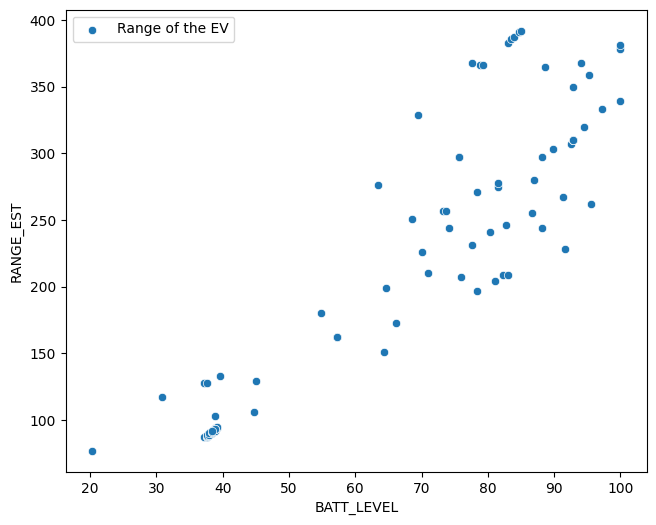

In [4]:
# Plotting the initial graph

plt.figure(figsize=(7.5,6))
ax = sns.scatterplot(x='BATT_LEVEL', y='RANGE_EST', data=df, label='Range of the EV')

### Training Elliptical Envelope

In [5]:
# Creating the elliptical envelope

ee = EllipticEnvelope(support_fraction=None, contamination=0.1)
y_pred = ee.fit_predict(df[['BATT_LEVEL', 'RANGE_EST']])

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1])

In [6]:
n_outliers = (y_pred == -1).sum()
n_outliers

11

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


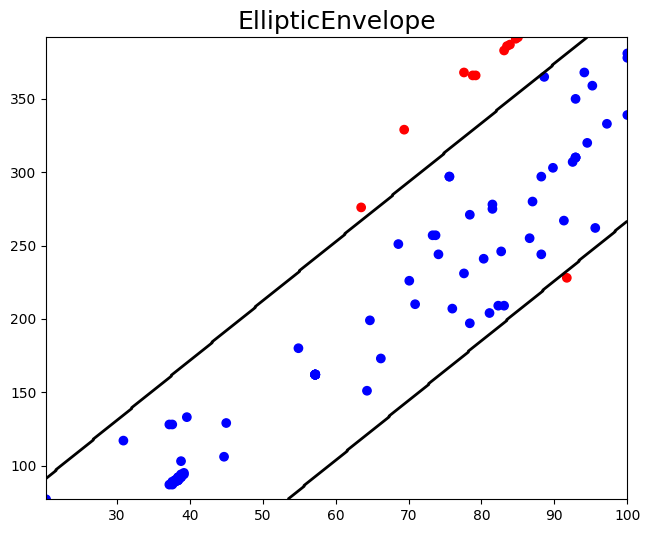

In [7]:
# Predicting and plotting the initial elliptical envelope

xx, yy = np.meshgrid(np.linspace(df['BATT_LEVEL'].min(), df['BATT_LEVEL'].max(), 500),
                     np.linspace(df['RANGE_EST'].min(), df['RANGE_EST'].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7.5,6))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(df['BATT_LEVEL'], 
            df['RANGE_EST'], 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

### Training Isolation Forest

In [8]:
# Training the Isolation Forest

isf =  IsolationForest(contamination=0.08)
y_pred = isf.fit_predict(df[['BATT_LEVEL', 'RANGE_EST']])

y_pred

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1])

In [9]:
n_outliers = (y_pred == -1).sum()
n_outliers

9

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


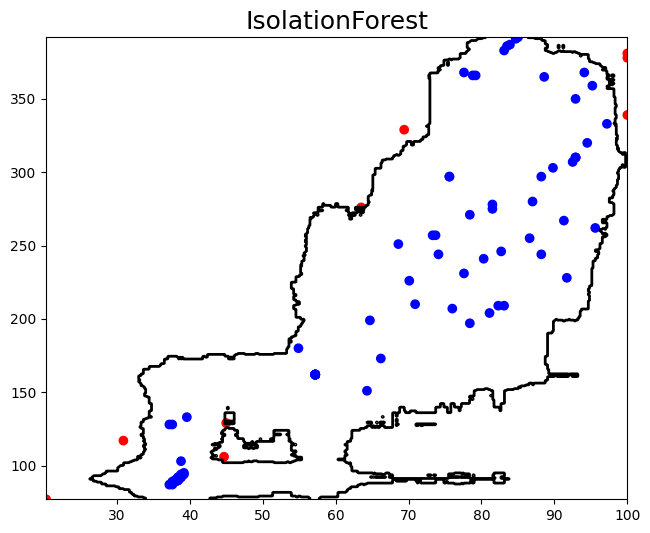

In [10]:
# Predicting and plotting the initial isolation forest

xx, yy = np.meshgrid(np.linspace(df['BATT_LEVEL'].min(), df['BATT_LEVEL'].max(), 500),
                     np.linspace(df['RANGE_EST'].min(), df['RANGE_EST'].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(7.5,6))

plt.title('IsolationForest', size=18)

plt.scatter(df['BATT_LEVEL'], 
            df['RANGE_EST'], 
            color=colors[(y_pred + 1) // 2])


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()